In [1]:
import geopandas as gpd

A jupyter `magic` command:

In [2]:
%matplotlib inline

Read in file. If you've used Pandas before, the method is really similar.

In [5]:
counties = gpd.read_file(
    "../output/counties_simple/counties_simple.shp"
)

This is just a shapefile from the Census that I've simplified a bit to remove cruft. It should give you polygons and some basic geographic data about US Counties. Learn more about it at the Census' [Tiger Line site](https://www.census.gov/geo/maps-data/data/tiger-line.html).

It's like a dataframe, which means you can use [Pandas methods](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) to transform and analyze it. But it's really a [`GeoDataFrame`](http://geopandas.org/data_structures.html).

In [6]:
type(counties)

geopandas.geodataframe.GeoDataFrame

The main thing that makes a DataFrame a `GeoDataFrame` is that it's got a `geometry` column that describes a point or a polygon.

In [7]:
counties.head(3)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((246290.0411551894 -328619.667039162,..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,680956809,61588406,+46.2946377,-123.4244583,POLYGON ((-1770686.983550074 398793.6640856052...
2,35,011,00933054,35011,De Baca,De Baca County,6016819484,29089486,+34.3592729,-104.3686961,POLYGON ((-422754.4474200015 -1210188.44889264...


In Pandas we have `DataFrame.plot()` which gives us some basic charting tools. GeoPandas does something very similar.

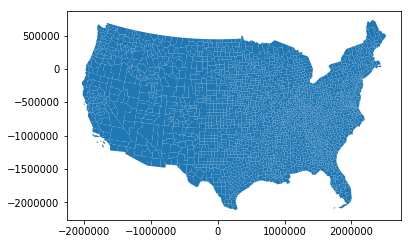

In [8]:
counties.plot();

You can pass in options to change how it looks. A full list is [here](http://geopandas.org/reference.html#geopandas.GeoDataFrame.plot).

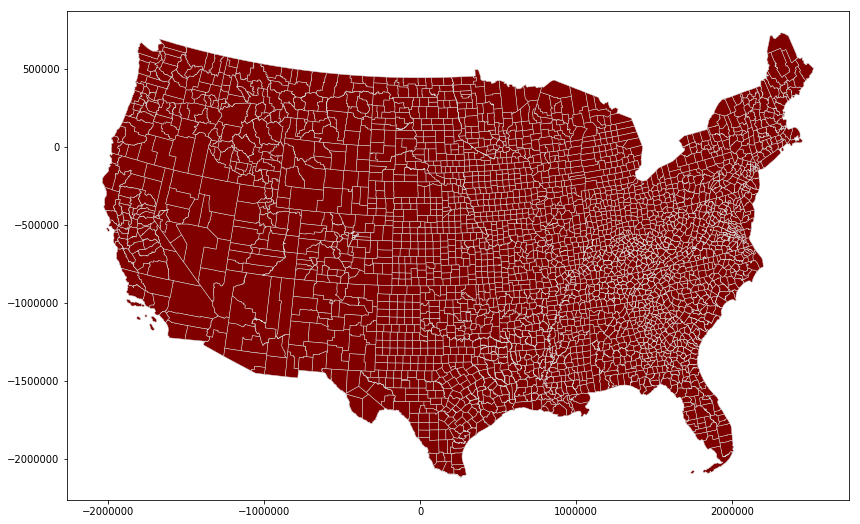

In [11]:
counties.plot(
    figsize = (16, 9), # a tuple giving width and height in INCHES (I know, it's dumb)
    color = "maroon",
    edgecolor = "lightgray",
    linewidth = 0.5
);

We can plot choropleths by simply delcaring a numeric column. Let's pick one.

In [12]:
counties.dtypes # in pandas an 'object' is a string

STATEFP     object
COUNTYFP    object
COUNTYNS    object
GEOID       object
NAME        object
NAMELSAD    object
ALAND        int64
AWATER       int64
INTPTLAT    object
INTPTLON    object
geometry    object
dtype: object

`Aland` is the land area. Plot it with the `column` parameter. It will take a moment because there's a lot of counties to draw!

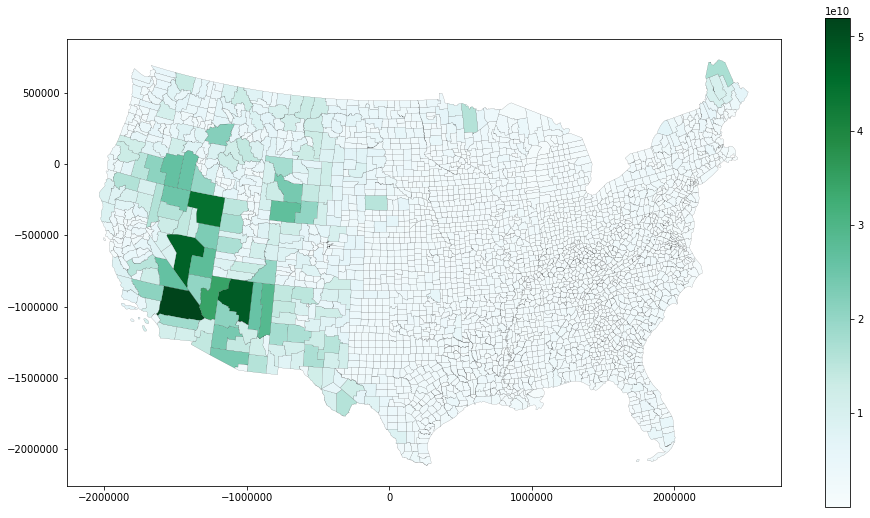

In [13]:
ax = counties.plot(
    figsize = (16, 9),
    column = "ALAND",
    cmap = "BuGn", # https://matplotlib.org/users/colormaps.html
    edgecolor = "black",
    linewidth = 0.1,
    legend = True
)

The axis box is kind of annoying. Unfortunately there's no built-in parameter in the `plot` function that removes this. But there's a funny method we can access right on the object that the plot function returns

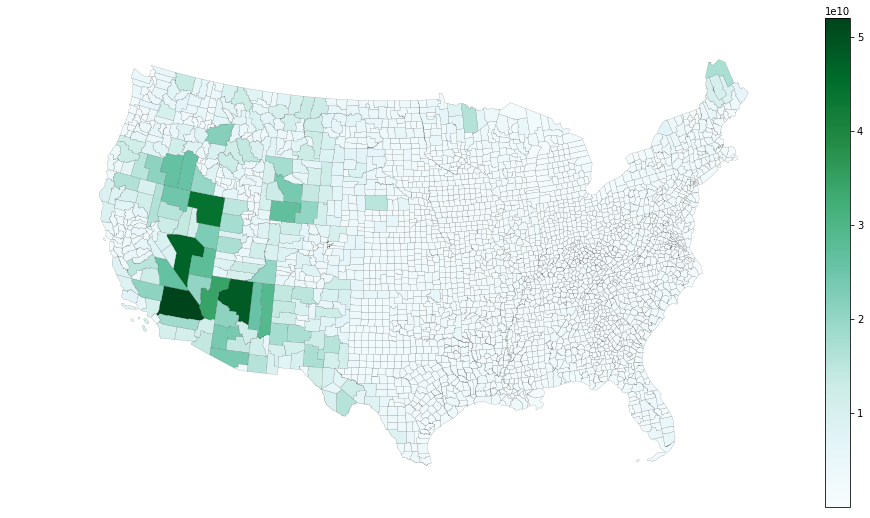

In [114]:
ax = counties.plot(
    figsize = (16, 9),
    column = "ALAND",
    cmap = "BuGn", # https://matplotlib.org/users/colormaps.html
    edgecolor = "black",
    linewidth = 0.1,
    vmax = 52000000000,
    legend = True
)

ax.axis("off");

Is the legend bothering you? We can fix it, but it's a PITA. It's a somewhat "advanced" mapping technique because but yeah let's just do it anyway

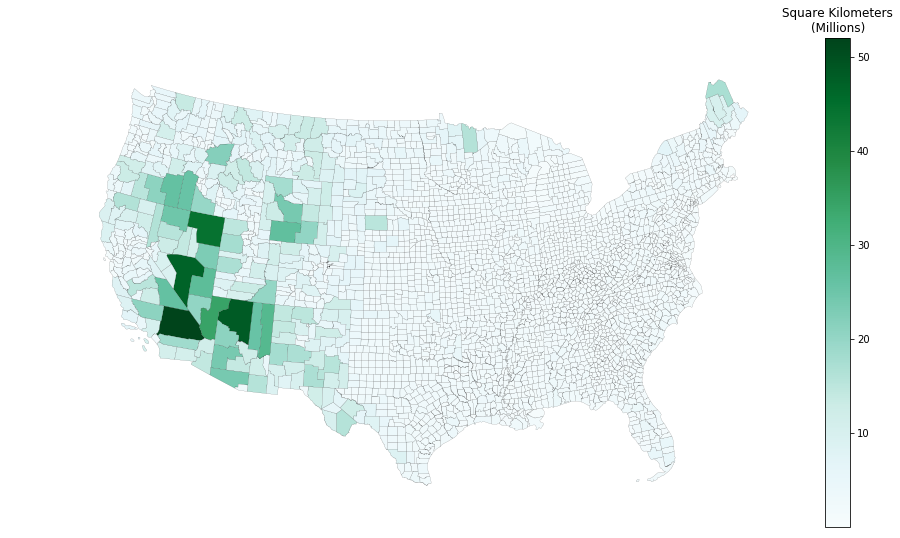

In [14]:
ax = counties.plot(
    figsize = (16, 9),
    column = "ALAND",
    cmap = "BuGn", # https://matplotlib.org/users/colormaps.html
    edgecolor = "black",
    linewidth = 0.1,
    vmax = 52000000000,
    legend = True
)

ax.axis("off")

# The color bar is an axis added to the figure when you do Legend = True. Access it by simply iterating through the axes
colorbar = ax.get_figure().get_axes()[1]
# This will return an Array of yticks. Treat it like a List
yticks = colorbar.get_yticks()
# Using string formatting. Adds commas and removes trailing zeros
colorbar.set_yticklabels(['{0:,.0f}'.format(ytick/1000000000) for ytick in yticks]);
# Just sets a title
colorbar.set_title("Square Kilometers\n(Millions)");
